In [1]:
from pylatexenc.latex2text import LatexNodes2Text
import time

'''
Project made by UFUK KEMAL METİN & EREN YILMAZ 
SENIOR PROJECT FOR FIZ-4901E/4902E

MAIN GOAL OF THIS PROJECT IS 
COMPUTING PATH INGETGRALS OF SPIN 0 PARTICLES
WITH FUNCTIONAL DERIVATIVE OF GENERATING FUNCTIONAL
BRIEFLY,
Z[J] = exp^{i∫d^4x d^4y J(x) Δ_F(x-y) J(y) } which represents the generating functional for free-field 
<0| T{φ(x_1)....φ(x_n) φ(z_1)φ(z_1)φ(z_1)φ(z_1)...φ(z_m)φ(z_m)φ(z_m)φ(z_m) ) |0> at J=0 
all φ(x_i) and φ(z_i)'s represent an operator and this operators correspond to functional derivative 
respect to J(x_i) and J(z_i) respectively where J's are the source.
'''

"\nProject made by UFUK KEMAL METİN & EREN YILMAZ \nSENIOR PROJECT FOR FIZ-4901E/4902E\n\nMAIN GOAL OF THIS PROJECT IS \nCOMPUTING PATH INGETGRALS OF SPIN 0 PARTICLES\nWITH FUNCTIONAL DERIVATIVE OF GENERATING FUNCTIONAL\nBRIEFLY,\nZ[J] = exp^{i∫d^4x d^4y J(x) Δ_F(x-y) J(y) } which represents the generating functional for free-field \n<0| T{φ(x_1)....φ(x_n) φ(z_1)φ(z_1)φ(z_1)φ(z_1)...φ(z_m)φ(z_m)φ(z_m)φ(z_m) ) |0> at J=0 \nall φ(x_i) and φ(z_i)'s represent an operator and this operators correspond to functional derivative \nrespect to J(x_i) and J(z_i) respectively where J's are the source.\n"

In [2]:
'''
#FEYNMAN PROPAGATOR Δ_F^{c}(a-b)
Green function of klein-gordon equation
a and b represent the what is the label
d represent how labeled it is
if d=4 means that either a or b labeled
if d=3 both of them labeled as particles(x_i)
if d=2 both of them labeled but different (z_i,x_j etc.)
if d=1 both of them labeled as interaction terms but different(z_i,z_j etc.)
if d=0 means that it is vacuum propagator(z_i,z_i)
'''
class D_F:
    # (D_F^c(a-b))
    def __init__(self,a,b,c=0,d=4):
        self.a = a
        self.b = b
        self.c = c
        self.d = d
    def __repr__(self):
        return str(self.b)
    def func_derive(self,respect,n=0):
        return []
    def comps(self):
        return [str(self.a),str(self.b),str(self.c),str(self.d)]
    def lat(self):
        stg = ' \\Delta_F'
        if self.c>0:
            stg += '^{' + str(self.c+1) + '}'
        if self.a == '0' and self.b == '0':
            stg += '(' +'0'+') '
            return stg  
        stg += '(' + str(self.a) + ',' +str(self.b) + ') '
        return stg  
        
'''
Source J(x)
It will yield the dirac delta when the 
functional derivative is taken on
dirac deltas later let the propagator 
get labeled, so it will be possible to
label the position
'''
class J:
    def __init__(self,x):
        self.x = x 
    def func_derive(self,respect,n=0):
        return [DD(self.x,respect,n)]
    def comps(self):
        return [str(self.x)]
    def lat(self):
        stg = 'J'
        stg += ' (' + str(self.x) +') '
        return stg  
        
'''
DIRAC DELTA δ^{c}(a-b)
δ/δJ(x_i) J(y_i) = δ(x_i-y_i)
This is the object of dirac delta defined 
to evaluate the labeling on propagotrs such as:
∫d^4y_i d^4y_j δ(y_j - x_i) Δ_F(y_i - y_j) J(y_i) Z = ∫d^4y_i Δ_F(y_i - x_i) J(y_i) Z
'''
class DD:
    # (DD^c(a-b))
    def __init__(self,a,b,c=0):
        self.a = a
        self.b = b
        self.c = c 
    def func_derive(self,respect,n=0):
        return []
    def comps(self):
        return [str(self.a),str(self.b),str(self.c)]

'''        
Integral
It is basic integral respect represents dx
degree will be used later for d^4x etc.
low and up are the bounds of integral
from where to where
'''
class integral:
    def __init__(self,respect,degree=None,low=None,up=None):
        self.respect = respect
        self.degree = degree
        self.low = low
        self.up = up
    def func_derive(self,respect,n=0):
        return []
    def comps(self):
        return [str(self.respect)]
    def lat(self):
        stg = ' \\int \\,'
        '''
        if self.low != None:
            stg += '_{'+ str(self.low) + '}' + '^{' + str(self.up) + '}'
        '''
        stg += 'd' + str(self.respect) + ' '
        return stg  


'''        
Z[J] corresponds to Generating Functional
Z[J] = exp^{i∫d^4x d^4y J(x) Δ_F(x-y) J(y) }
It is one of the main part
If the functional derivative got taken
it yields labeled propagator concerning 
given position set
'''
class Z:
    def __init__(self,j=0):
        self.j = j
    def func_derive(self,rp,n=0):
        return [integral('y_1'),J('y_1'),D_F('y_1',rp),Z(self.j)]
    def comps(self):
        return [str(self.j)]
    def lat(self):
        stg = ' Z[0] '
        return stg

In [3]:
'''
There are 3 type of labeling
y_ sets represent unlabeled
x_ sets represent labeled as particle
z_ sets represent labeled as interaction
Interactions are set as φ^4
The program has up to 40 functional derivatives and 
can be changed by, changing limit_set
Even though it is observed that after the 18th functional derivative 
time has needed goes up to 600+ seconds
'''
limit_set = 40
init_sets = ["y_"+str(a) for a in range(1,limit_set)]
particle_set = ["x_"+str(a) for a in range(1,limit_set)]
interaction_set = ["z_"+str(a) for a in range(1,int(limit_set/4))]
interaction_set = sorted(4*interaction_set)


#It is a loop function to run all functions go ahead.
def do_(expr,p,la):
    rp = particle_set[0:p]+interaction_set[0:4*la]
    for t in range(0,len(rp)):
        start_time = time.time()
        expr = same_all(checker_all(dirac_all((derive_all(expr,rp[t])))))
        print(str(t+1)+". functional derivation took ", time.time() - start_time, " seconds to run")
        
        #delete the comment parameter above if you want to see how much time it spent on the derivative
        #as it told above and also inituatively can be seen this computation is not linear
    return expr
    
    
    
  
'''
"_all" named functions will be called as main functions
derive_all will get expressions which is nested lists [[]]
it will return the resulted derivated expression
'''
def derive_all(expr,rp):
    submit = []
    #loop in order to derivate all the inner lists
    for t in expr:
        sub = derivator(t,rp)
        for t_ in sub:
            submit.append(t_)
    return submit


'''
sub function of derive_all 
this function gets the list element with
objects and derive it one by one if it has
objects like integral,propagator,dirac delta have 
no derivative so they only yield []
others will be stored in another list
and return into the derive_all
derive_all append all the list elements   
'''
def derivator(expr,rp):
    submit = []
    for t in expr:
        sub = expr + t.func_derive(rp)
        if t.func_derive(rp) != []:
            sub.remove(t)
        #objects like integral does not yield anything
        #so it got passed
        if t.func_derive(rp) == []:
            continue
        submit.append(sub)
    return submit
    
'''
The sources yield dirac delta 
and they have to be evaluated
it is the main function in order to
done that.
'''
def dirac_all(expr):
    submit = []
    for t in expr:
        submit.append(diracor(t))
    return submit
    

'''    
it is sub-function of dirac_all
Basically, it has done the computation below as an example:
∫d^4y_i Δ_F(y_i - x_i) DD(y_i-x_j) Z =  Δ_F(x_j - x_i)Z
Besides, it also re-define the propagator by changing it's
d value(see above explanation of class D_F)
'''
def diracor(expr):
    integrals = []
    diracs = []
    propagators = []
    org_propagators = []
    for t in expr:
        if isinstance (t,integral):
            integrals.append(t)
        if isinstance (t,D_F):
            if t.d == 4:
                propagators.append(D_F(t.a,t.b,t.c,t.d))
                org_propagators.append(t)
        if isinstance (t,DD):
            diracs.append(t)
    if len(diracs) == 0:
        return expr
    for t_ in integrals:
        if diracs[0].a != t_.respect:
            integrals.remove(t_)
    expr.remove(integrals[0])
    expr.remove(diracs[0])
    for p in range(0,len(propagators)):
        expr.remove(org_propagators[p])
        if propagators[p].a == diracs[0].a:
            propagators[p].a = diracs[0].b
            if ('x' in propagators[p].a) and ('x' in propagators[p].b):
                propagators[p].d = 3
            elif ('z'in propagators[p].a) and ('z'in propagators[p].b):
                propagators[p].d = 1
                if propagators[p].a == propagators[p].b:
                    propagators[p].d = 0
            elif ('x' in propagators[p].a or 'z'in propagators[p].a) and ('x' in propagators[p].b or 'z'in propagators[p].b):
                propagators[p].d = 2
        if propagators[p].b == diracs[0].a:
            propagators[p].b = diracs[0].b
            if ('x' in propagators[p].a) and ('x' in propagators[p].b):
                propagators[p].d = 3
            elif ('z'in propagators[p].a) and ('z'in propagators[p].b):
                propagators[p].d = 1
                if propagators[p].a == propagators[p].b:
                    propagators[p].d = 0
            elif ('x' in propagators[p].a or 'z'in propagators[p].a) and ('x' in propagators[p].b or 'z'in propagators[p].b):
                propagators[p].d = 2
        expr.append(propagators[p])
    return expr
    
''' 
functional derivative of generating functional always yield
propagator with y_i -"rp" so that they all mean to be the same
but it is not the exact case, so they need to be changed
by another set with not "labeled" type
also, it will be used for ordering
Order of the objects:
vacuum propagator(z_i,z_i)
interactions but different(z_i,z_j)
interaction and particle(z_i,x_j)
particle-particle(x_i,x_j)
then the other objects (if they remain) by:

integral
corresponding source
propagator with one unlabeled(either x_i,y_j or z_i,y_j)

At last the generating functional itself

'''
def checker_all(expr):
    submit = []
    for t in expr:
        submit.append(checker(t))
    return submit
    
    
def checker(expr):
    submit = []
    integrals = []
    sources = []
    propagators = []
    v_propagators = []
    zz_propagators = []
    zx_propagators = []
    xx_propagators = []
    
    Zs = []
    for t in expr:
        if isinstance (t,integral):
            integrals.append(integral(t.respect))
        if isinstance (t,J):
            sources.append(J(t.x))
        if isinstance (t,Z):
            Zs.append(Z(t.j))
        if isinstance (t,D_F):
            if t.d == 4:
                propagators.append(D_F(t.a,t.b,t.c,t.d))
            elif t.d == 3:
                xx_propagators.append(D_F(t.a,t.b,t.c,t.d))
            elif t.d == 2:
                zx_propagators.append(D_F(t.a,t.b,t.c,t.d))
            elif t.d == 1:
                zz_propagators.append(D_F(t.a,t.b,t.c,t.d))
            elif t.d == 0:
                v_propagators.append(D_F(t.a,t.b,t.c,t.d))
    submit += sorted(v_propagators,key=lambda x: x.b)
    submit += sorted(zz_propagators,key=lambda x: x.b)
    submit += sorted(zx_propagators,key=lambda x: x.b)
    submit += sorted(xx_propagators,key=lambda x: x.b)
    for p in range(0,len(integrals)):
        integrals[p].respect = init_sets[p]
        sources[p].x = init_sets[p]
        propagators[p].a = init_sets[p]
    for p in range(0,len(integrals)):
        submit.append(integrals[p])
        submit.append(sources[p])
        submit.append(propagators[p])
    submit += Zs
    return submit
    

'''
It is used to eliminate the same type of expressions 
to reduce the workload on the pc.
'''
def same_all(expr):
    submit = []
    submit_ = []
    for a in expr:
        submit.append(str_comp(a))
    if len(submit) == 1:
        return expr
    while submit != []:
        submit_.append(expr[0])
        expr,submit = is_same(expr,submit,submit[0])
    return submit_
    
'''  
in order for them to be distinguished
all the list elements objects turn into the string
so it can now turn into the "==" case 
which means checkable
'''
def str_comp(expr):
    submit = []
    for t in expr:
        submit = submit + t.comps()
    return submit
    
'''
sub-function of same_all gets the whole expression
check whether the same expressions exist
if it exists then get the number of the index in a nested list
then eliminate it by its index number in reversed order
'''
def is_same(org_list,comp_list,comped):
    if len(org_list) <= 1:
        return [[],[]]
    remove_list = []
    for t in range(0,len(comp_list)):
        if comp_list[t] == comped:
            remove_list.append(t)
    remove_list.reverse()
    for t_ in remove_list:
        org_list.pop(t_)
        comp_list.pop(t_)
    return [org_list,comp_list]
    
'''
It is the main function written to 
convert all nested list elements into 
readable latex format, 
all classes have a "lat" function that makes them readable.
'''
def ltx_all(expr):
    submit = '\\begin{equation}\n'
    for t in expr:
        submit += ltx(t)

    return submit + '\\end{equation}'
#sub function of ltx_all
def ltx(expr):
    submit = ''
    for t in expr:
        submit += t.lat()
    return submit + '\n'



'''
If the expression got any J's it means
there are unlabeled terms that exist
this function got the whole expression and 
eliminate the terms with J's 
hence, only the terms with the labeled propagator remain.
'''
def Jo(expr):
    remove_list = []
    for t in range(0,len(expr)):
        for t1 in range(0,len(expr[t])):
            if isinstance (expr[t][t1],J):
                remove_list.append(t)
                break
    remove_list.reverse()
    for t in remove_list:
        expr.pop(t)
    for t in range(0,len(expr)):
        for t1 in range(0,len(expr[t])):
            if isinstance (expr[t][t1],Z):
                expr[t].remove(expr[t][t1])
    
    return expr


'''
This function returns the initial list that takes
for particles and for interactions's set(not dict {})
another part is all intercation(z_i's) set as false 
it will be used in eliminating disconnected terms
which contribute the vacuum terms
'''
def feynman_map(fmap,ftmap,p,la):
    for t in range(1,p+1):
        fmap['x_'+str(t)] = ''
    for t in range(1,la+1):
        fmap['z_'+str(t)] = set()
        ftmap['z_'+str(t)] = False
    return [fmap,ftmap]

'''
it will eliminate the disconnected terms in whole equations
checking it with is_dc function and at final return the remaining
connected terms.
Note that: it should not used if there are no interaction terms...
'''
def dc_destroyer_all(expr,p,la):
    rp = particle_set[0:p]+interaction_set[0:4*la]
    submit = []
    for t in expr:
        '''
        if is_dc(t,feynman_map({},p,la)):
            submit.append(t)
        '''
        if is_dc(t,feynman_map({},{},p,la)):
            submit.append(t)
    return submit
'''    
It will take the feynman_map function's returned list
firstly it checks what particle set(x_i) bound to
and set the interaction set (z_i) as true,
then the loop runs for the amount of interaction/2
the loop check what the interaction(z_i) bound to which
every interaction it got, it changed to True
If there is any interaction set(z_i) has a false value
It means that there are vacuum terms either 
only connected each other or with the other z_j
afterward, it will be checked as a disconnected term and eliminated.
'''
def is_dc(expr,fmap):
    dc = False
    f_map = fmap[0].copy()
    ft_map = fmap[1].copy()
    for t in expr:
        if 'x' in str(t.a):
            f_map[str(t.a)] = str(t.b)
        if 'x' in str(t.b):
            f_map[str(t.b)] = str(t.a)
        if 'z' in str(t.a):
            f_map[str(t.a)].add(str(t.b))
        if 'z' in str(t.b):
            f_map[str(t.b)].add(str(t.a))
    for t in [x for x in f_map.keys() if 'x' in x]:
        if 'z' in f_map[t]:
            ft_map[f_map[t]] = True
    if not any(list(ft_map.values())):
        return False
    for t in range(0,1+int(len(ft_map.keys())/2)):
        for t_ in [x for x in ft_map.keys() if 'z' in x]:
            if ft_map[t_] == True:
                for a in f_map[t_]:
                    if 'z' in a:
                        ft_map[a] = True
    return all(list(ft_map.values()))

[ 7.48509067e-06 -4.25310309e-04  9.79712318e-03 -1.17584047e-01
  7.87400703e-01 -2.92980921e+00  5.70868235e+00 -5.12812969e+00
  1.61654412e+00]


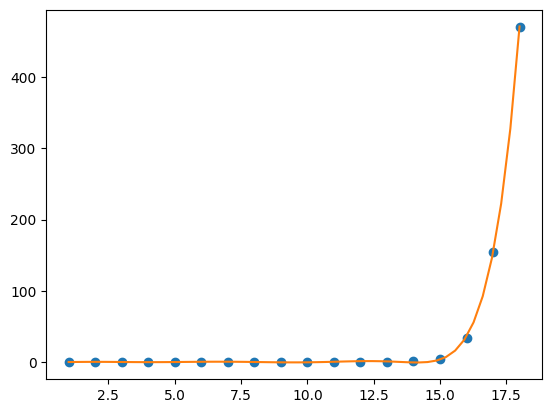

In [30]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import MaxNLocator

t = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]
t_ = [0,0.001,0,0,0,0.001,0.002,0.004,0.008,0.01,0.07,0.12,0.4,1,3.8,34,155,471]



z = np.polyfit(t, t_, 8)
print(z)
f = np.poly1d(z)

# calculate new x's and y's
tnew = np.linspace(t[0], t[-1], 50)
t_new = f(tnew)
plt.xticks(np.arange(min(t), max(t)+1, 1.0))
plt.plot(t,t_,'o', tnew, t_new)

fig.savefig("test.png")
plt.show()